# Loan Approval Prediction ML Model



In [57]:
#importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Lectura de Archivo 
df= pd.read_csv(r'C:\Users\lforesto\Desktop\Lute\Data Science\Proyectos ML\loan_approval_dataset.csv')
df.head(20)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [59]:
df.shape

(4269, 13)

In [60]:
# Obtenemos informacion de las columnas de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [62]:
#Hacemos un decribe para ver medias, desvios, percentiles. 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [63]:
#Contar los valores null o 0
# isna
print("Cantidad de NA: \n\n",df.isna().sum())

# isnull
print("Cantidad de Nulos: \n\n",df.isnull().sum())

Cantidad de NA: 

 loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64
Cantidad de Nulos: 

 loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


## Encoding Categorical Data

In [64]:
#Identificamos todas las columnas de nuestro dataset
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [66]:
#Sacamos el espacio en blanco que tienen las columnas
df.columns = df.columns.str.strip()
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [67]:
df['education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [68]:
df['self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [69]:
df['loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [70]:
from sklearn.preprocessing import OrdinalEncoder

In [71]:
# Creamos el codificador indicandole el orden para la primer variable "education"
encoder = OrdinalEncoder(categories=[[" Not Graduate", " Graduate", 
                                      ]])
df['education'] = encoder.fit_transform(df[['education']])
df['education'].unique()

array([1., 0.])

In [72]:
# Creamos el codificador indicandole el orden para la segunda variable "self_employed"
encoder = OrdinalEncoder(categories=[[" No", " Yes", 
                                      ]])
df['self_employed'] = encoder.fit_transform(df[['self_employed']])
df['self_employed'].unique()

array([0., 1.])

In [73]:
# Creamos el codificador indicandole el orden para la tercer variable "loan_status"
encoder = OrdinalEncoder(categories=[[" Rejected", " Approved", 
                                      ]])
df['loan_status'] = encoder.fit_transform(df[['loan_status']])
df['loan_status'].unique()

array([1., 0.])

In [74]:
#Vemos en el dataframe si los cambios se hicieron correctamente
df.head(20)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1.0,0.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1.0
1,2,0,0.0,1.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0.0
2,3,3,1.0,0.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0.0
3,4,3,1.0,0.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0.0
4,5,5,0.0,1.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0.0
5,6,0,1.0,1.0,4800000,13500000,10,319,6800000,8300000,13700000,5100000,0.0
6,7,5,1.0,0.0,8700000,33000000,4,678,22500000,14800000,29200000,4300000,1.0
7,8,2,1.0,1.0,5700000,15000000,20,382,13200000,5700000,11800000,6000000,0.0
8,9,0,1.0,1.0,800000,2200000,20,782,1300000,800000,2800000,600000,1.0
9,10,5,0.0,0.0,1100000,4300000,10,388,3200000,1400000,3300000,1600000,0.0


In [75]:
#Vamos a sacar la columna loan_id ya que no nos aporta nada a nuestro análisis
df.drop(['loan_id'],axis=1,inplace=True)

In [76]:
df.head(20)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1.0,0.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1.0
1,0,0.0,1.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0.0
2,3,1.0,0.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0.0
3,3,1.0,0.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0.0
4,5,0.0,1.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0.0
5,0,1.0,1.0,4800000,13500000,10,319,6800000,8300000,13700000,5100000,0.0
6,5,1.0,0.0,8700000,33000000,4,678,22500000,14800000,29200000,4300000,1.0
7,2,1.0,1.0,5700000,15000000,20,382,13200000,5700000,11800000,6000000,0.0
8,0,1.0,1.0,800000,2200000,20,782,1300000,800000,2800000,600000,1.0
9,5,0.0,0.0,1100000,4300000,10,388,3200000,1400000,3300000,1600000,0.0


## EDA

In [77]:
# Medimos la correlacion de cada una de las variables con nuestro Output "Target"
df.corr()['loan_status']

no_of_dependents           -0.018114
education                   0.004918
self_employed               0.000345
income_annum               -0.015189
loan_amount                 0.016150
loan_term                  -0.113036
cibil_score                 0.770518
residential_assets_value   -0.014367
commercial_assets_value     0.008246
luxury_assets_value        -0.015465
bank_asset_value           -0.006778
loan_status                 1.000000
Name: loan_status, dtype: float64

### Análisis Univariado

Comenzaremos analizando cada una de las variables de manera individual, para entender su composición y distribución.

<Axes: >

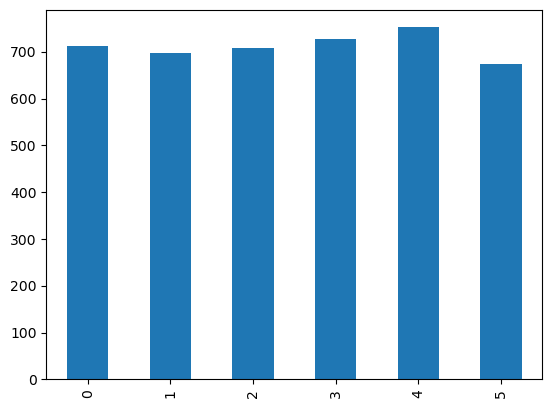

In [18]:
#En primer lugar, vamos a ver como esta distribuido nuestro dataset en relacion a las variables categoricas
df['no_of_dependents'].value_counts().sort_index().plot.bar()


<Axes: >

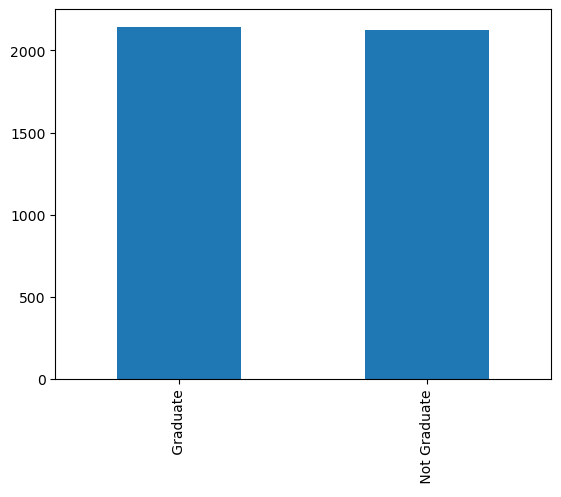

In [19]:
df['education'].value_counts().plot.bar()

<Axes: >

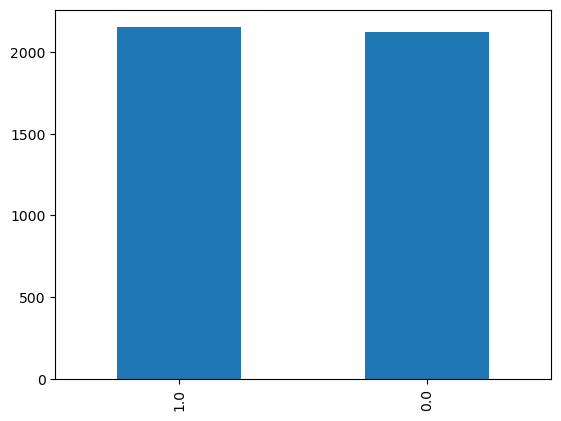

In [20]:
df['self_employed'].value_counts().plot.bar()

<Axes: ylabel='loan_status'>

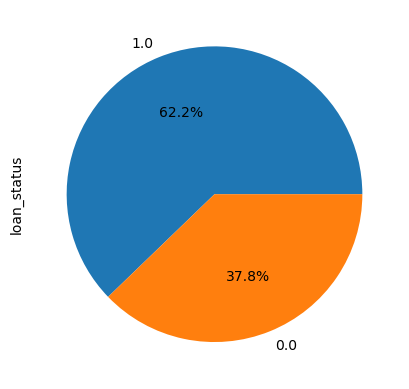

In [21]:
#Vemos el % de prestamos aprobados y no aprobados
df['loan_status'].value_counts().plot.pie(autopct = '%1.1f%%')

In [22]:
df['loan_status'].value_counts()

1.0    2656
0.0    1613
Name: loan_status, dtype: int64

Esto nos permite ver que estamos frente a un dataset casi completamente balanceado. En el único punto que vemos que esto no es asi, es en cuanto a los loans aprobados y rechazados, en donde hay un 65% mas de aprobados.

<Figure size 1000x500 with 0 Axes>

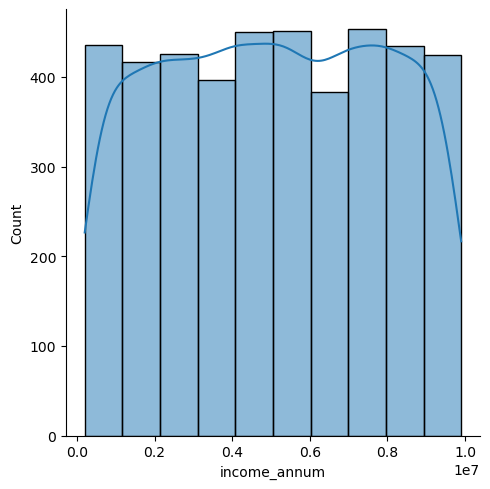

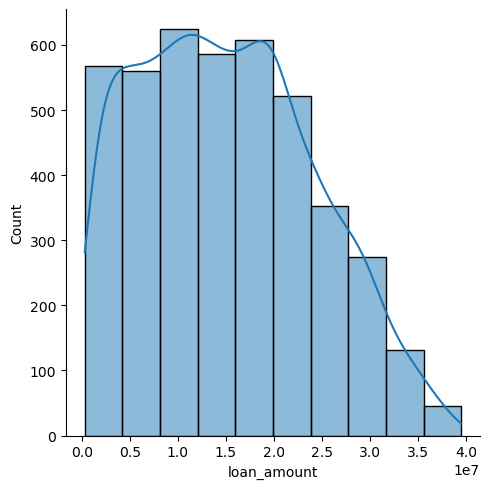

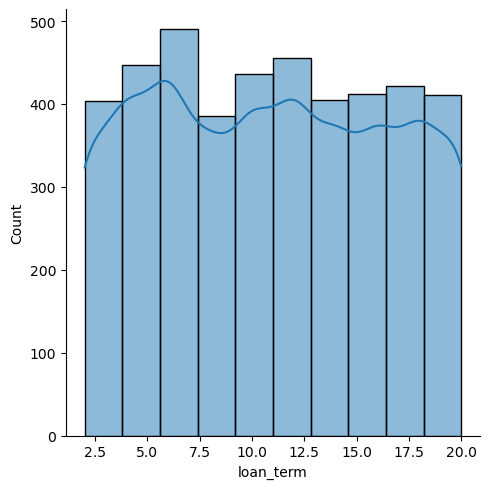

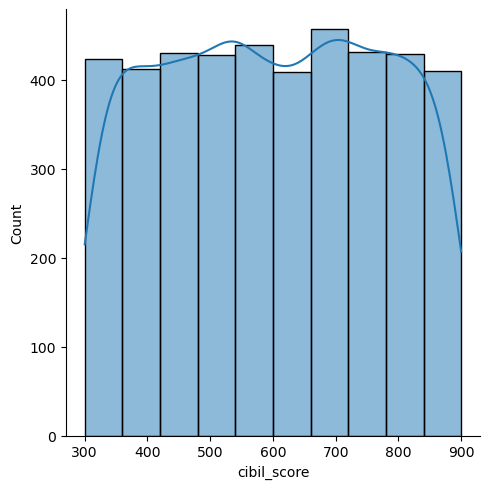

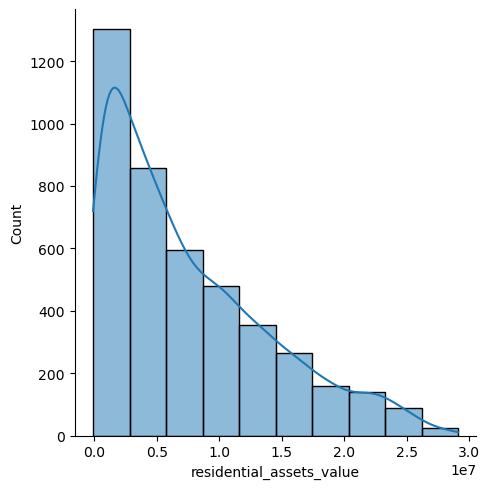

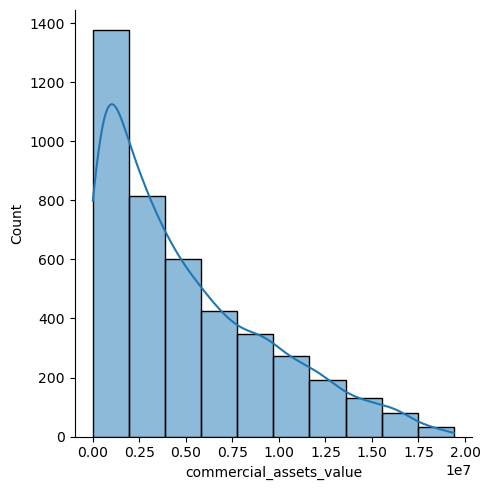

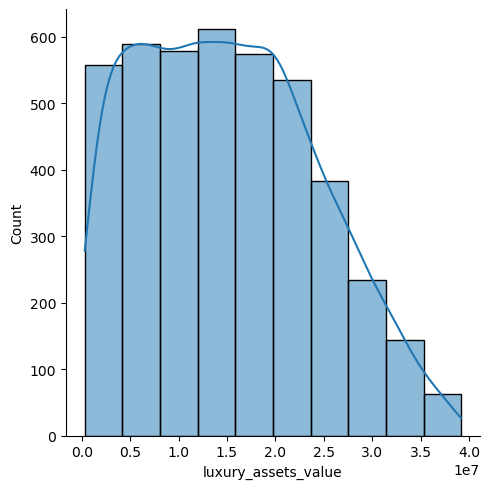

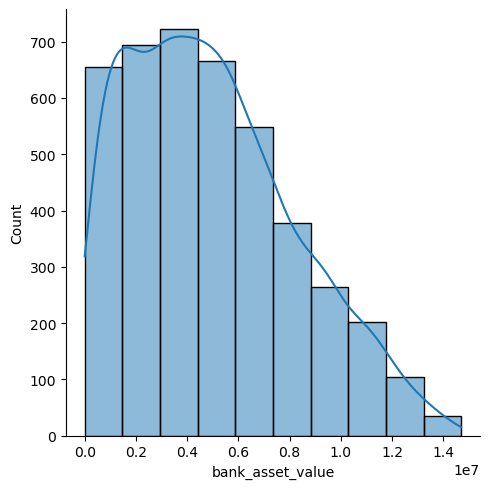

In [23]:
#Hacemos un Displot para cada una de las variables continuas para poder entender su distribución.
plt.figure(figsize=(10,5))
sns.displot(df.income_annum, kde=True, bins=10,label='income_annum')
sns.displot(df.loan_amount, kde=True, bins=10, label='loan_amount')
sns.displot(df.loan_term, kde=True, bins=10, label='loan_term')
sns.displot(df.cibil_score, kde=True, bins=10, label='cibil_score')
sns.displot(df.residential_assets_value, kde=True, bins=10, label='residential_assets_value')
sns.displot(df.commercial_assets_value, kde=True, bins=10, label='commercial_assets_value')
sns.displot(df.luxury_assets_value, kde=True, bins=10, label='luxury_assets_value')
sns.displot(df.bank_asset_value, kde=True, bins=10, label='bank_asset_value')

C:\Users\lforesto\AppData\Local\Temp\ipykernel_16760\4128243691.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax = ax)
C:\Users\lforesto\AppData\Local\Temp\ipykernel_16760\4128243691.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax = ax)
C:\Users\lforesto\AppData\Lo

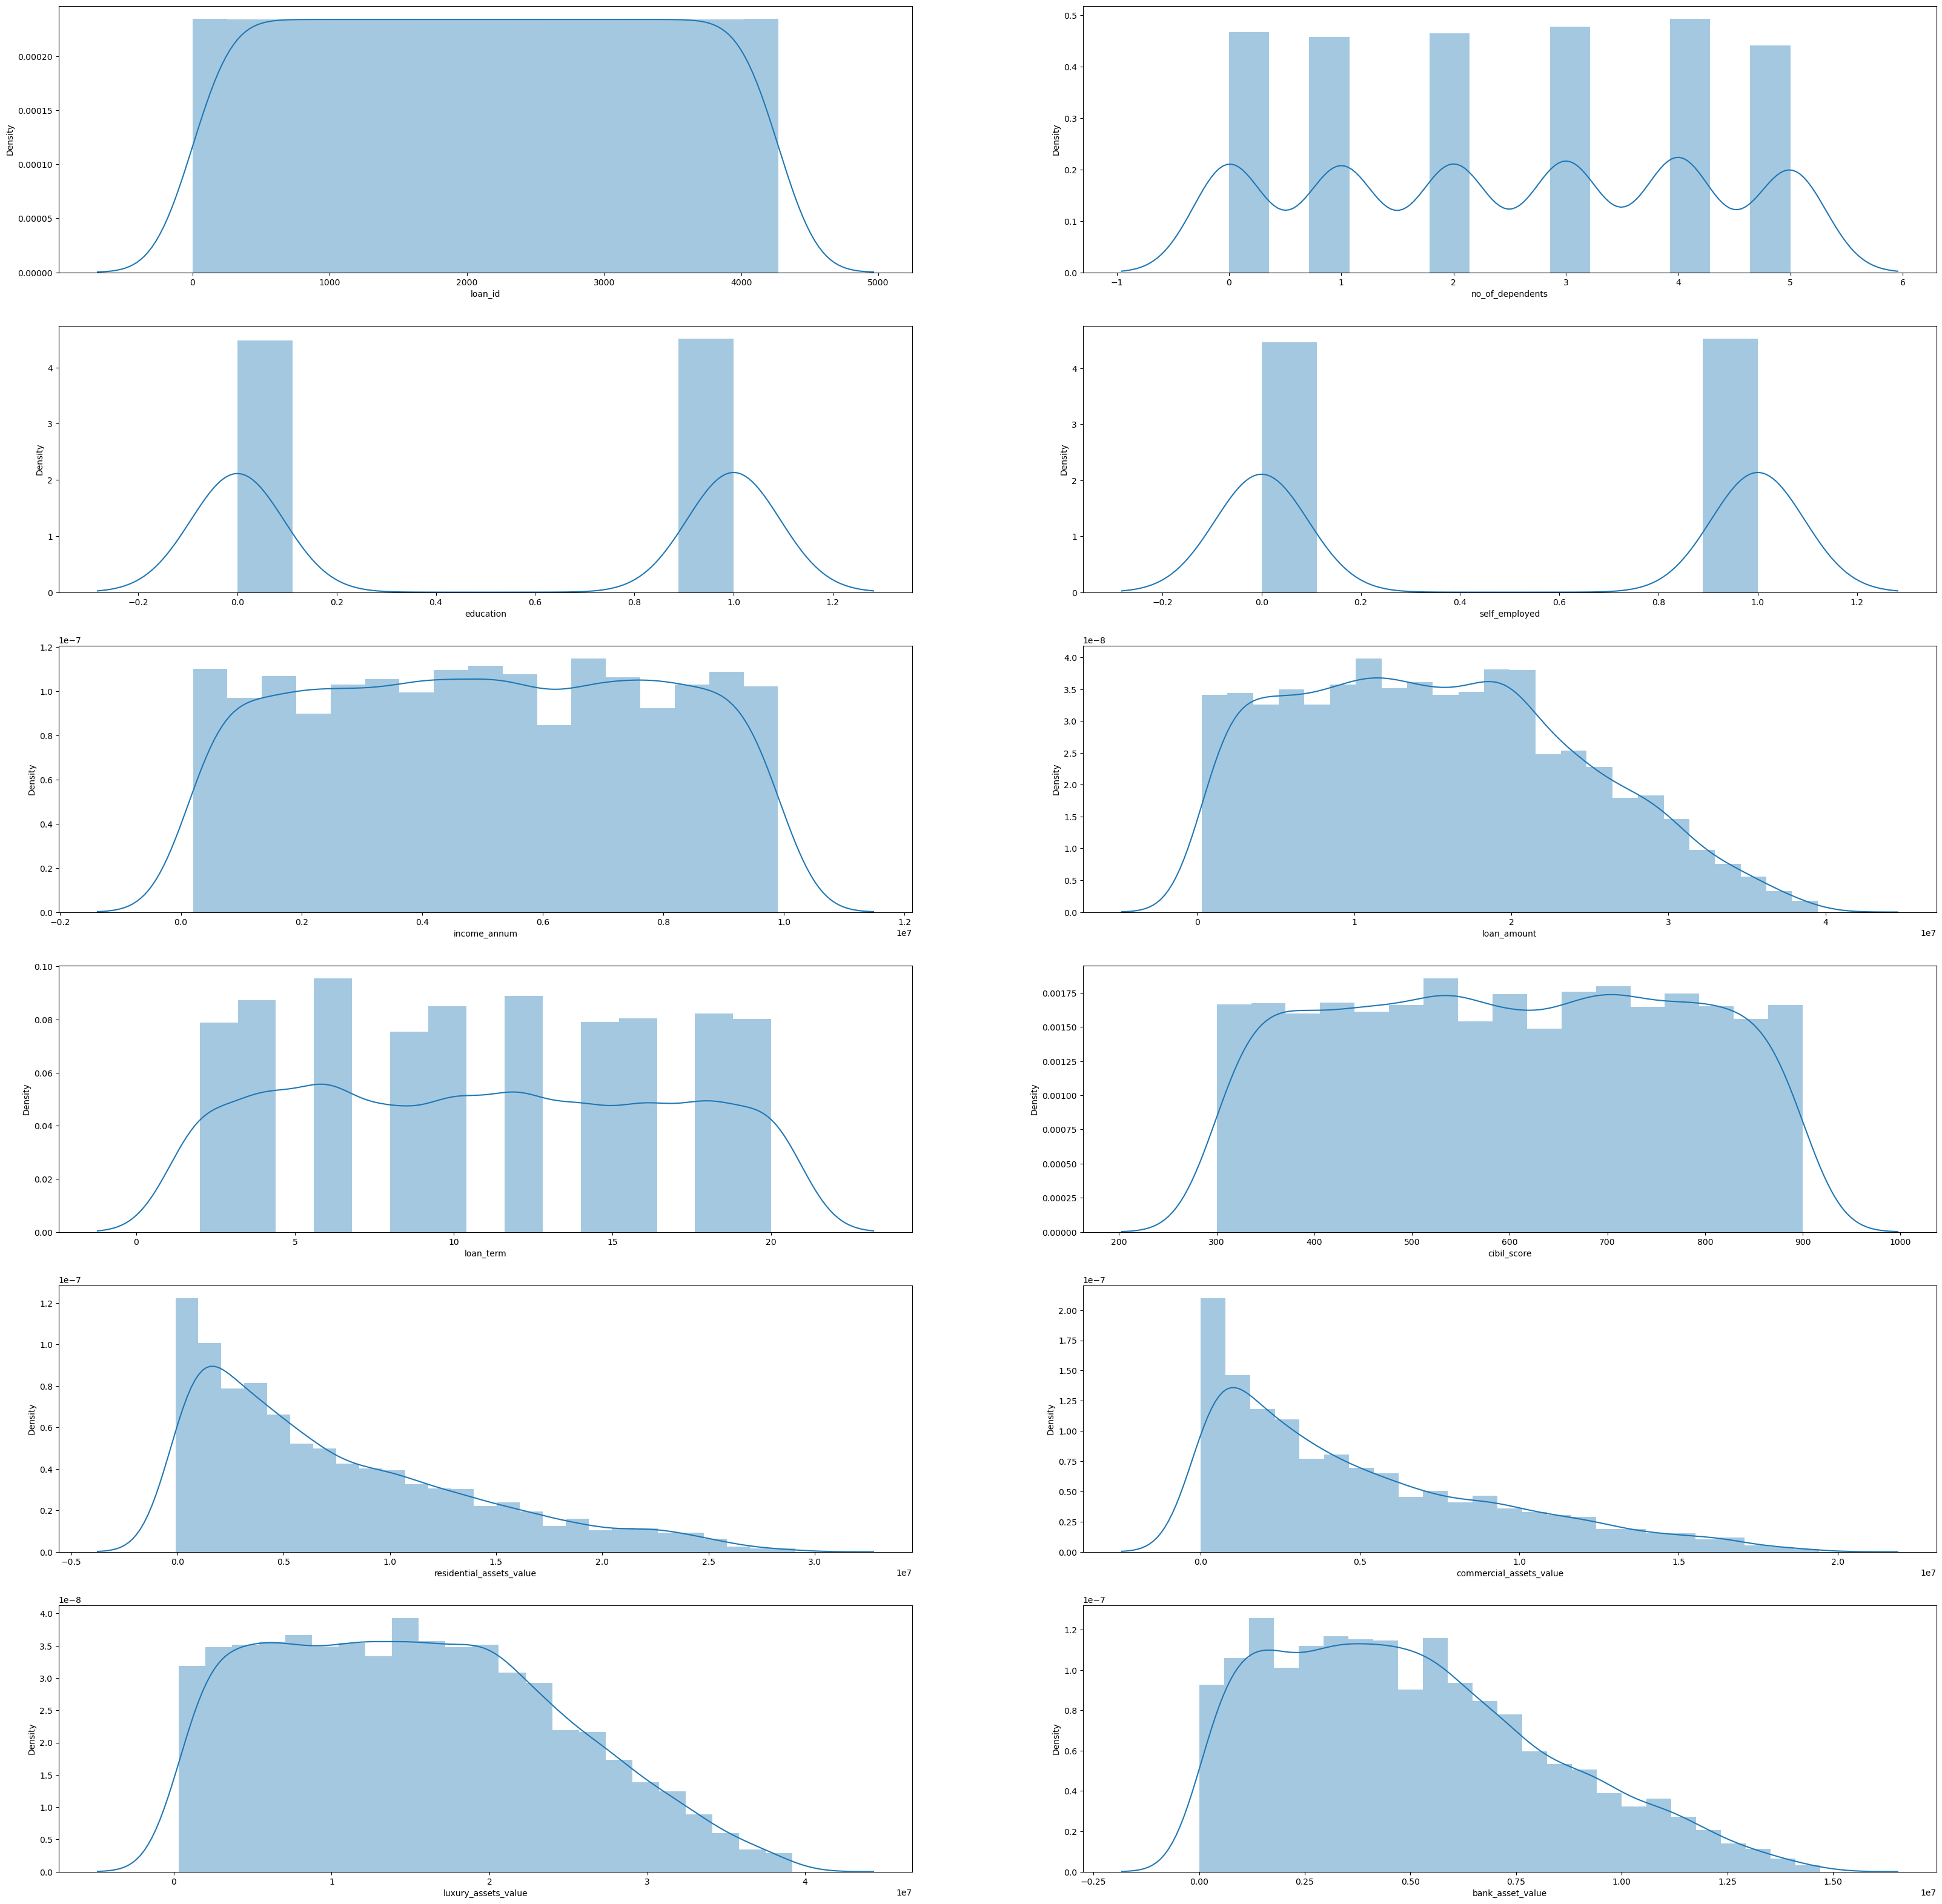

In [37]:
#Con esta forma podemos hacer que itere y muestre para todas las columnas en un formato mas amigable para la vista.
fig, axes = plt.subplots(nrows = 6, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(40,40)

for ax, col in zip(axes, df.columns):
  sns.distplot(df[col], ax = ax)

Boxplot entre target y no_of_dependents ==>  -0.018114422862177633


C:\Users\lforesto\AppData\Local\Temp\ipykernel_24784\1466950459.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f"Boxplot entre target y {i} ==> ",df.corr().loc['loan_status'][i])


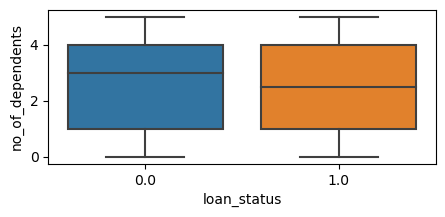

C:\Users\lforesto\AppData\Local\Temp\ipykernel_24784\1466950459.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f"Boxplot entre target y {i} ==> ",df.corr().loc['loan_status'][i])


KeyError: 'education'

In [24]:
#De esta forma podemos hacer una diagrama de cajas y bigotes para cada variable en relacion a loan_status, para entender distribucion y si hay outliers.
plt.figure(figsize=(5,2))
for i in df.columns:
    if i != 'loan_status':
        print(f"Boxplot entre target y {i} ==> ",df.corr().loc['loan_status'][i])
        sns.boxplot(x='loan_status',y=i,data=df)
        plt.show()
plt.show()

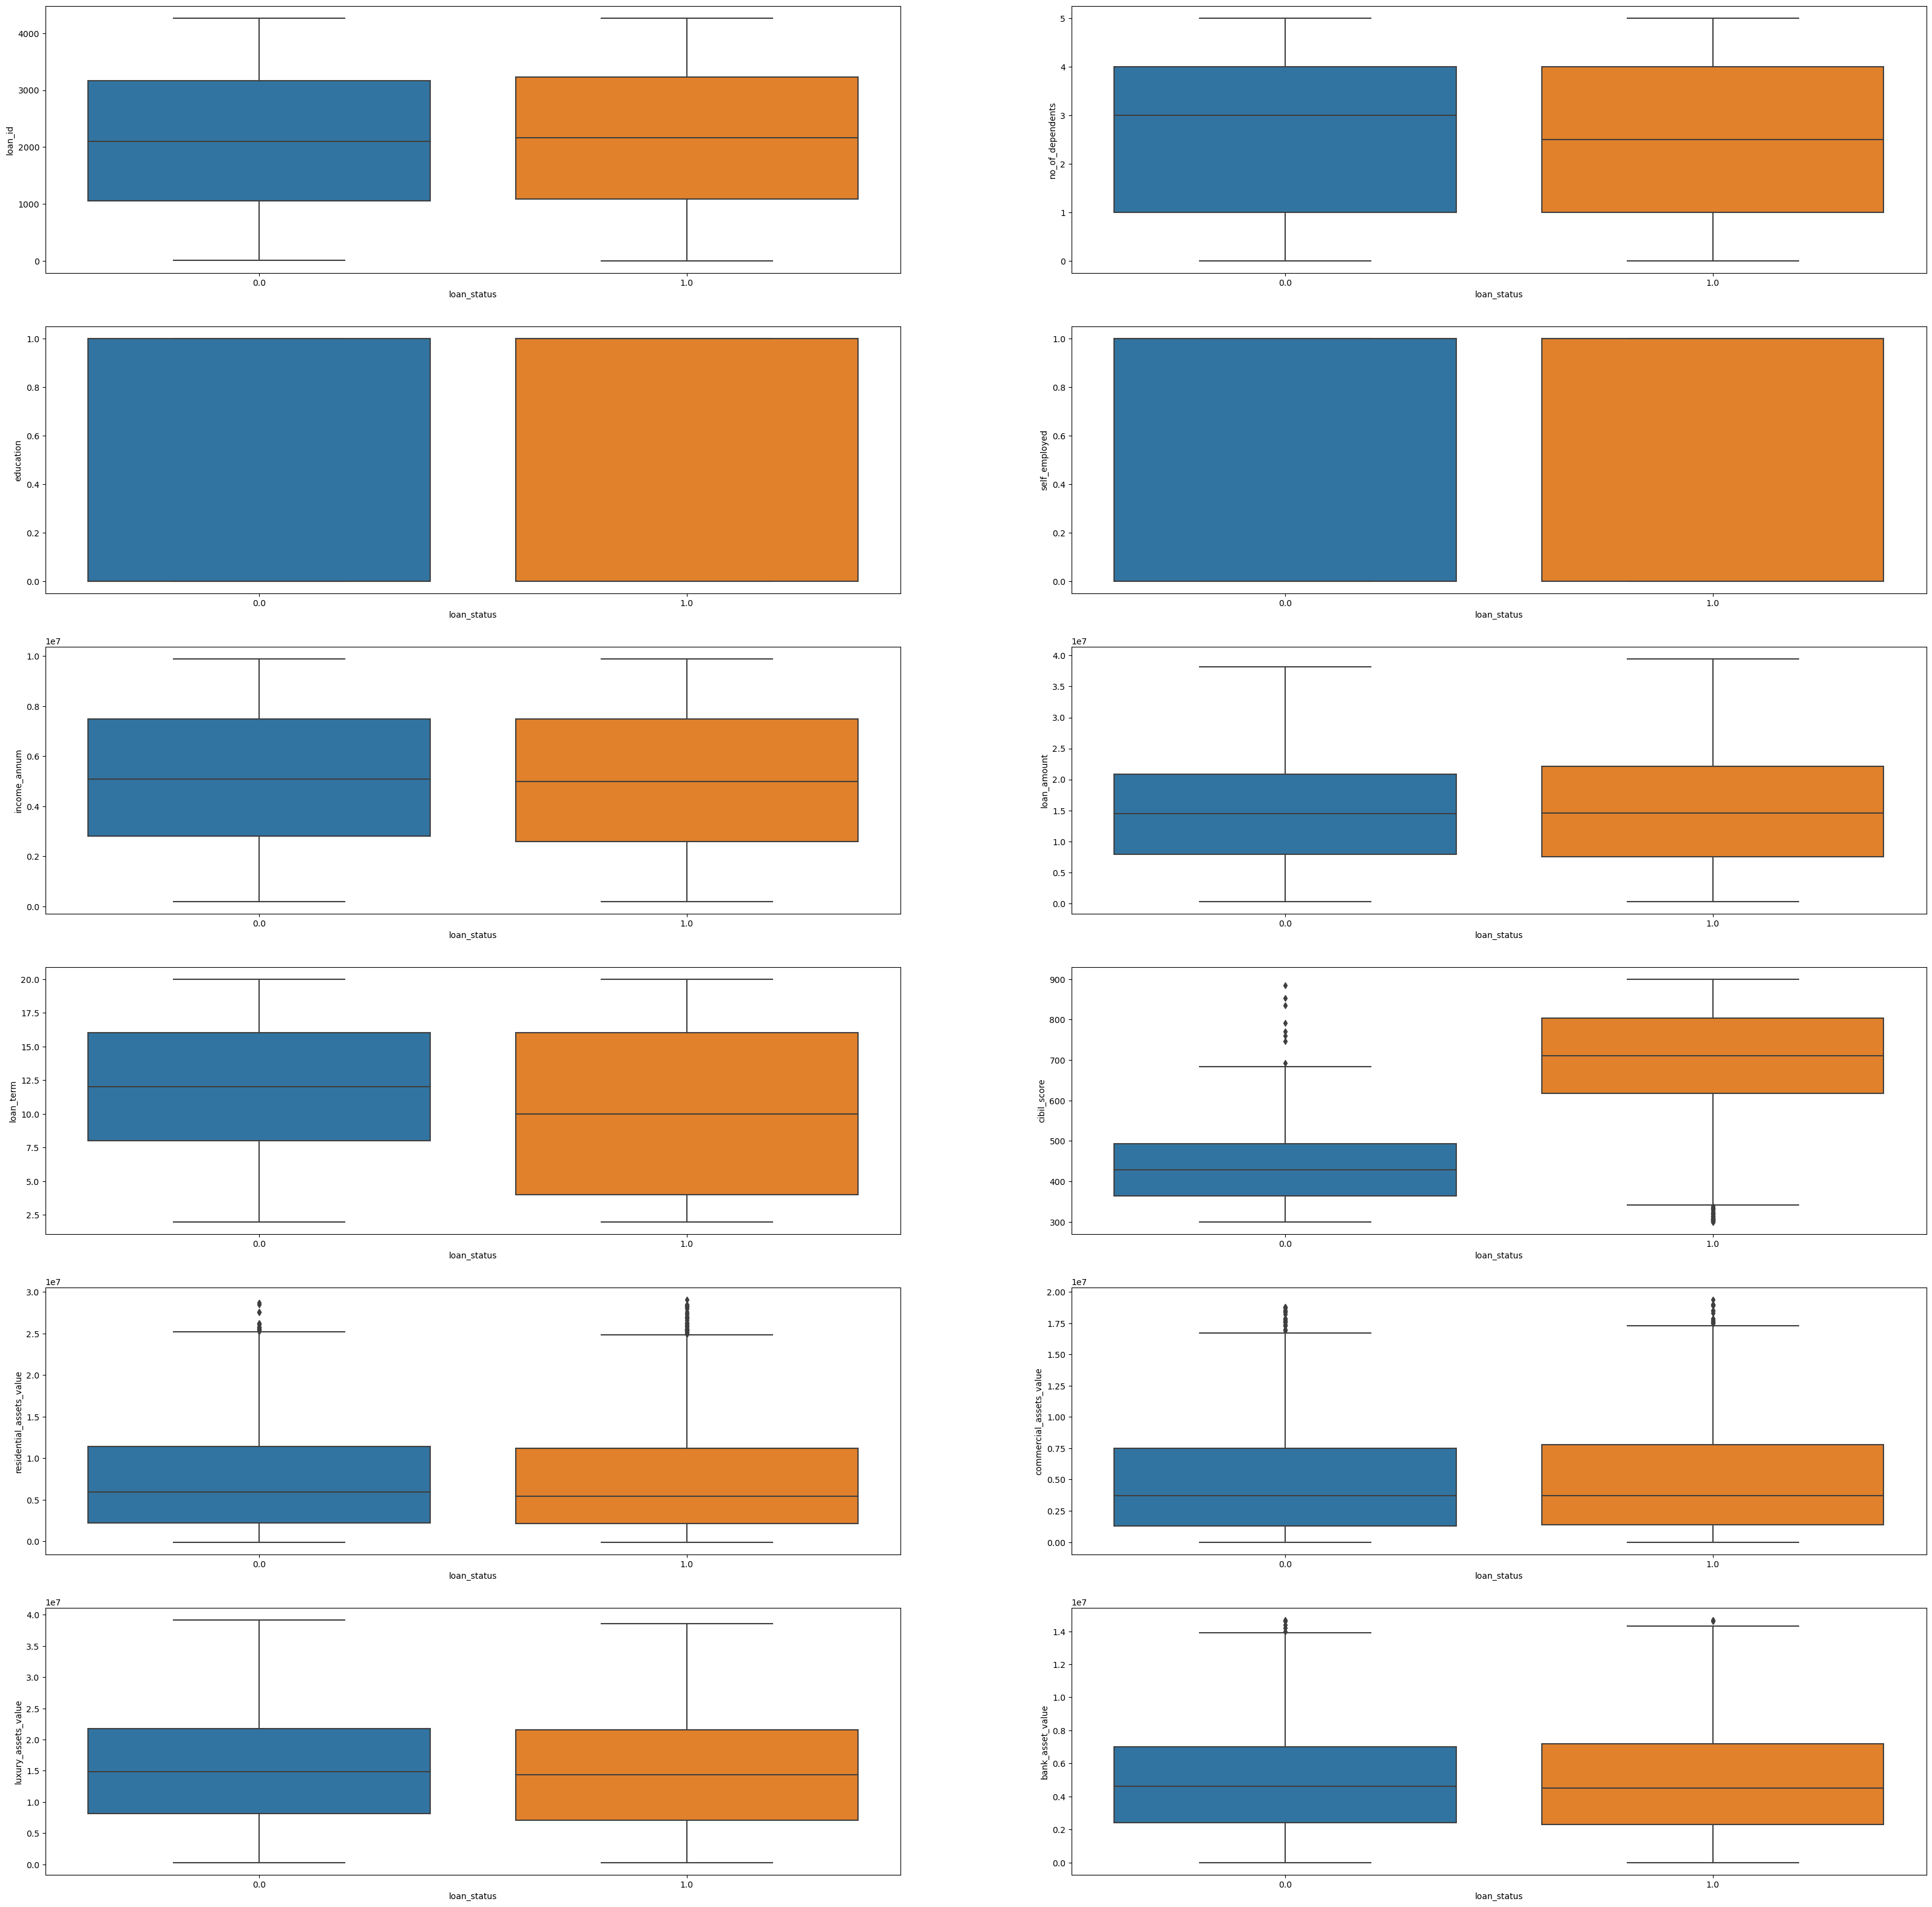

In [43]:
#Otra forma de hacerlo mas agradable para la vista 
fig, axes = plt.subplots(nrows = 6, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(40,40)

for ax, col in zip(axes, df.columns):
  sns.boxplot(x='loan_status',y=df[col], ax = ax , data=df)

<Axes: xlabel='income_annum', ylabel='loan_amount'>

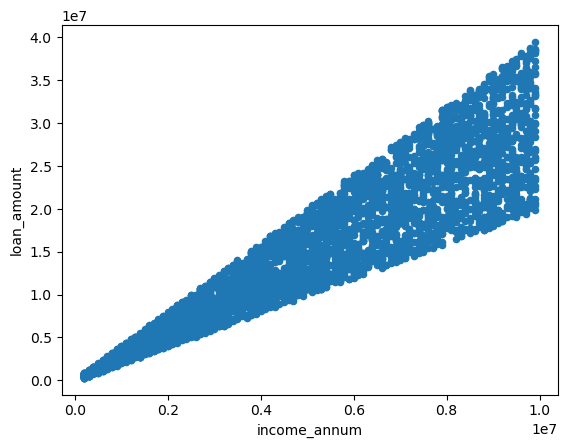

In [25]:
df.plot.scatter(x='income_annum', y='loan_amount')

<Axes: xlabel='commercial_assets_value', ylabel='loan_amount'>

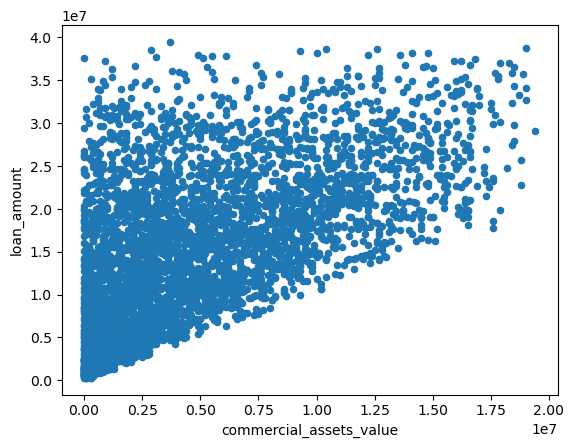

In [26]:
df.plot.scatter(x='commercial_assets_value', y='loan_amount')

<Axes: xlabel='bank_asset_value', ylabel='loan_amount'>

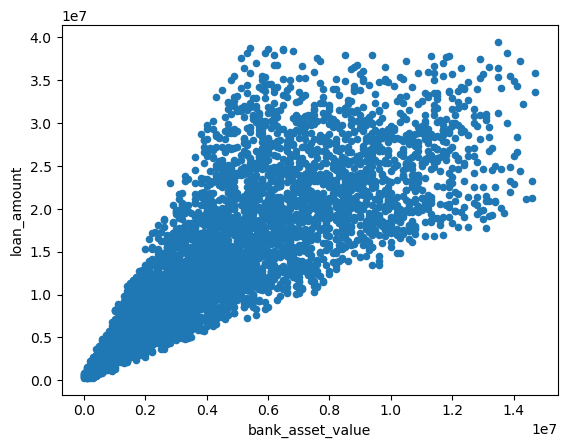

In [27]:
df.plot.scatter(x='bank_asset_value', y='loan_amount')

<Axes: xlabel='luxury_assets_value', ylabel='loan_amount'>

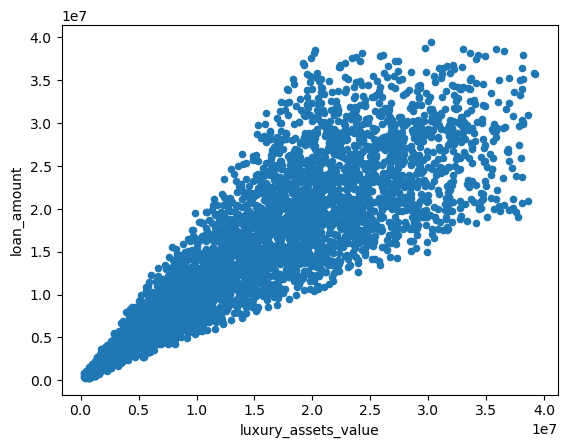

In [28]:
df.plot.scatter(x='luxury_assets_value', y='loan_amount')

<Axes: xlabel='residential_assets_value', ylabel='loan_amount'>

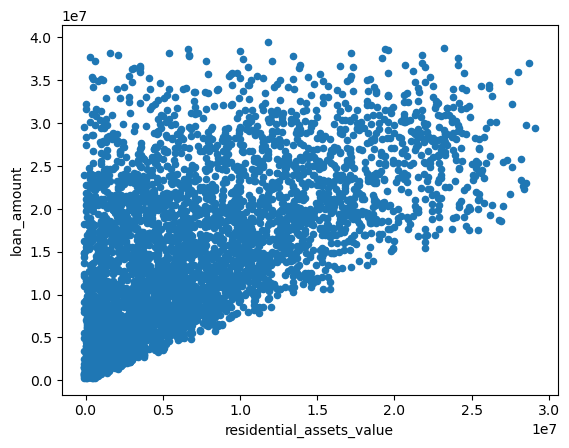

In [29]:
df.plot.scatter(x='residential_assets_value', y='loan_amount')

<Axes: xlabel='cibil_score', ylabel='loan_amount'>

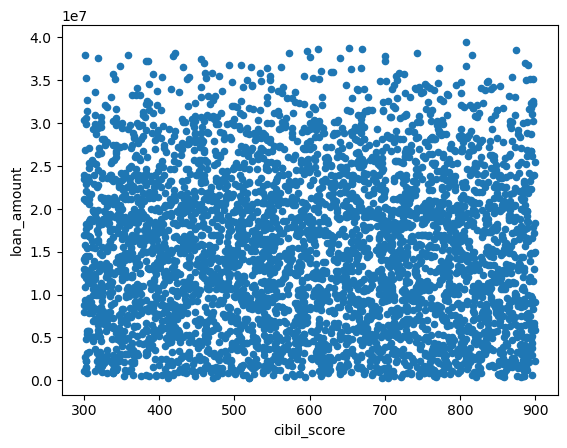

In [30]:
df.plot.scatter(x='cibil_score', y='loan_amount')

                           cibil_score
loan_status education                 
0.0          Graduate       430.624845
             Not Graduate   428.315594
1.0          Graduate       700.447349
             Not Graduate   706.526955


<Axes: xlabel='loan_status,education'>

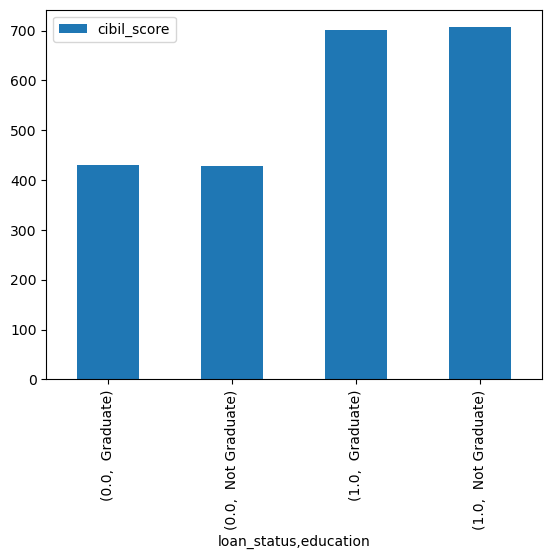

In [31]:
#Agrupamos por loan_status y educacion y lo comparamos con el cibil score
education= df.groupby(['loan_status', 'education']).mean()[['cibil_score']]
print(education)

#Lo vemos en forma de barplot
education.plot.bar(stacked=True)

                           cibil_score
loan_status self_employed             
0.0         0.0             431.000000
            1.0             427.956897
1.0         0.0             703.963581
            1.0             702.967862


C:\Users\lforesto\AppData\Local\Temp\ipykernel_24784\281305379.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  self_employed= df.groupby(['loan_status', 'self_employed']).mean()[['cibil_score']]


<Axes: xlabel='loan_status,self_employed'>

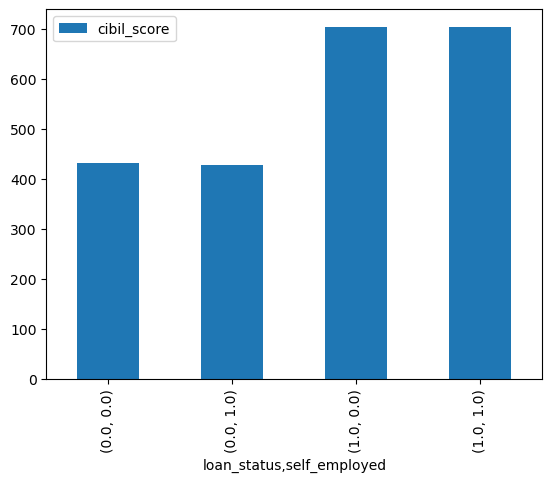

In [32]:
#Agrupamos por loan_status y self employed y lo comparamos con el cibil score
self_employed= df.groupby(['loan_status', 'self_employed']).mean()[['cibil_score']]
print(self_employed)

#Lo vemos en forma de barplot
self_employed.plot.bar(stacked=True)

                              cibil_score
loan_status no_of_dependents             
0.0         0                  429.278431
            1                  435.149813
            2                  430.531835
            3                  429.944444
            4                  423.292683
            5                  429.059925
1.0         0                  697.708972
            1                  706.627907
            2                  703.721088
            3                  696.761488
            4                  710.724731
            5                  705.527094


<Axes: xlabel='loan_status,no_of_dependents'>

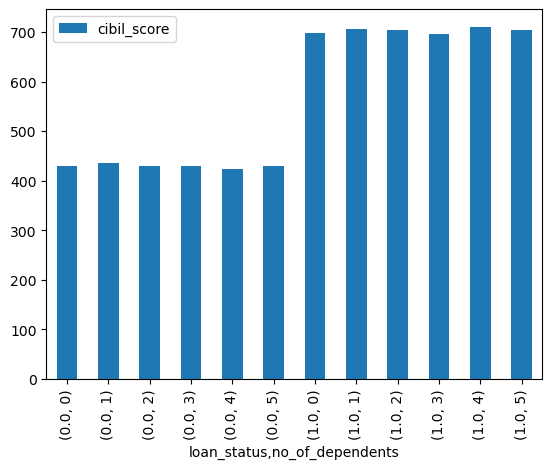

In [57]:
#Agrupamos por loan_status y dependents y lo comparamos con el cibil score
dependents= df.groupby(['loan_status', 'no_of_dependents']).mean()[['cibil_score']]
print(dependents)

#Lo vemos en forma de barplot
dependents.plot.bar(stacked=True)

## Análisis Multivariado

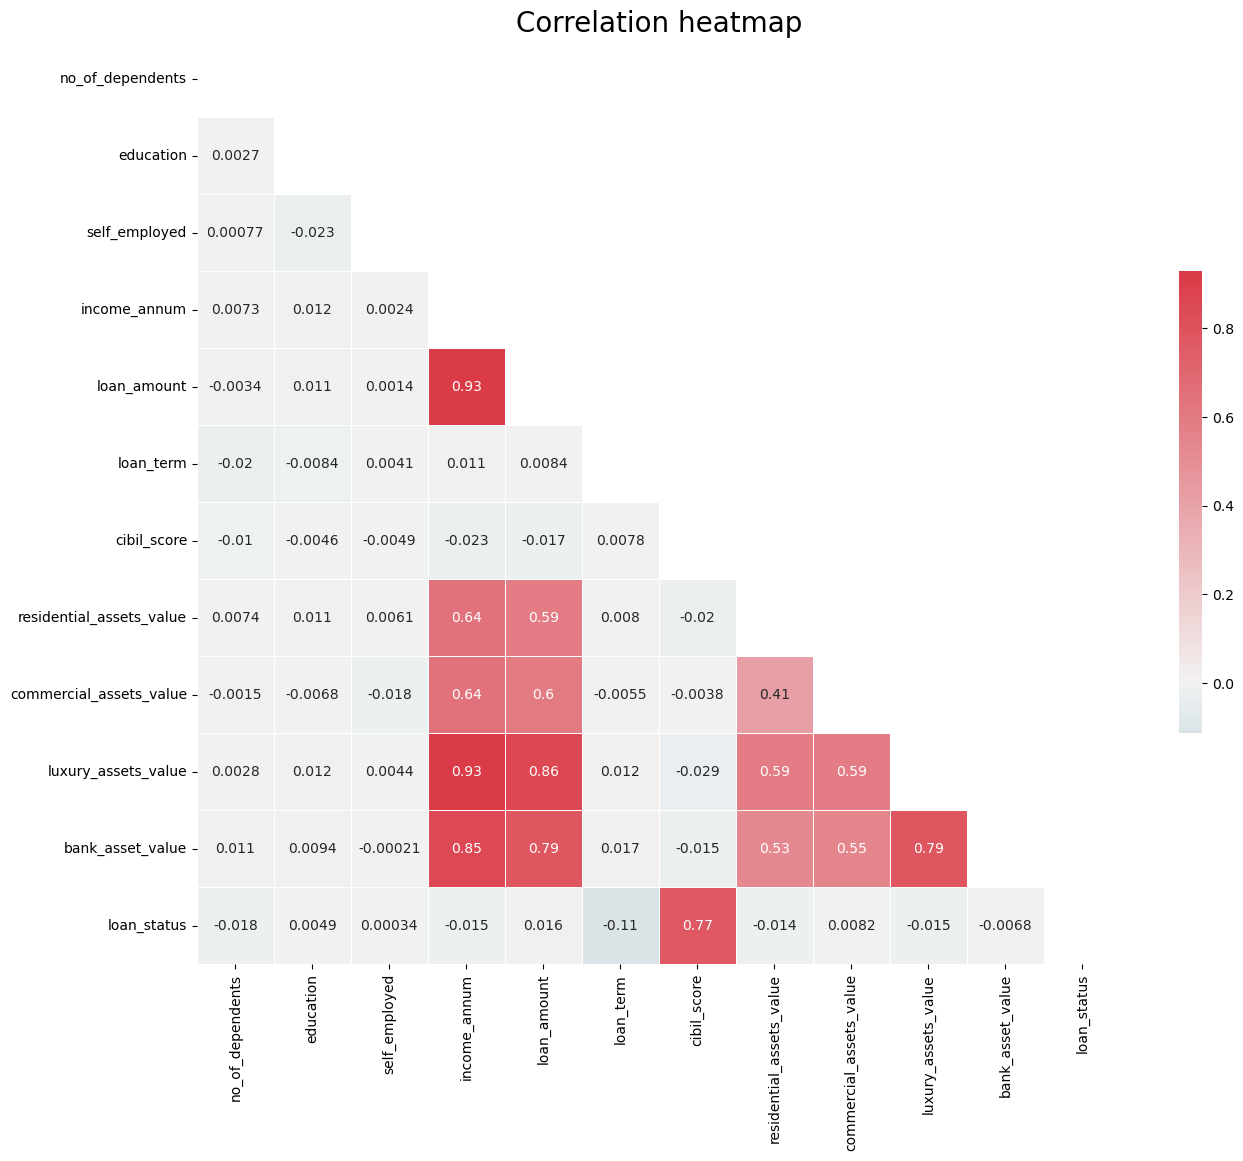

In [78]:
#Creacion de Heatmap para visualizar mejor las correlaciones
mask = np.triu(np.ones_like(df.corr(), dtype='bool'))
f, ax = plt.subplots(figsize=(15,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(df.corr(), mask=mask, cmap=cmap, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_title('Correlation heatmap',fontsize=20)
plt.show()

Conclusiones Correlacion Matrix:

## Algoritmos de Clasificación

In [79]:
#Separamos en X e y.
X = df.drop(['loan_status'], axis=1) #Elimino de mi dataset la variable a predecir 
y= df['loan_status'] #Defino el Target

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
#Escalo los datos para ponerlos a todos en la misma sintonia
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform (X)

In [82]:
#Importamos la libreria para separar en train y test
from sklearn.model_selection import train_test_split 

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Decision Tree

In [83]:
X_train.shape, X_test.shape

((2988, 11), (1281, 11))

In [84]:
#Traemos el decission tree
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo

tree = DecisionTreeClassifier(max_depth=15, random_state = 42) #Creamos el modelo

#Ajustamos el modelo
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

In [85]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [86]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.975800156128025


### KNN

In [87]:

from sklearn.neighbors import KNeighborsClassifier
# Paso 1
knn = KNeighborsClassifier(n_neighbors=3)

# Paso 2
knn.fit(X_train, y_train)

# Paso 3
y_test_pred = knn.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.5690866510538641


### Regresión Logistica

In [89]:
from sklearn.linear_model import LogisticRegression

# Paso 1
regresion_logistica = LogisticRegression(random_state=11)

# Paso 2
regresion_logistica.fit(X,y)

# Paso 3
y_test_pred = regresion_logistica.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.6330991412958626


### Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
# Paso 1
model = RandomForestClassifier(random_state=11, n_jobs=6)
# Paso 2
model.fit(X_train, y_train)
# Paso 3
y_test_pred = model.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9773614363778298


Para los modelos mas simples y conocidos, vemos que la mayor Accuracy nos las trae el Random Forest.

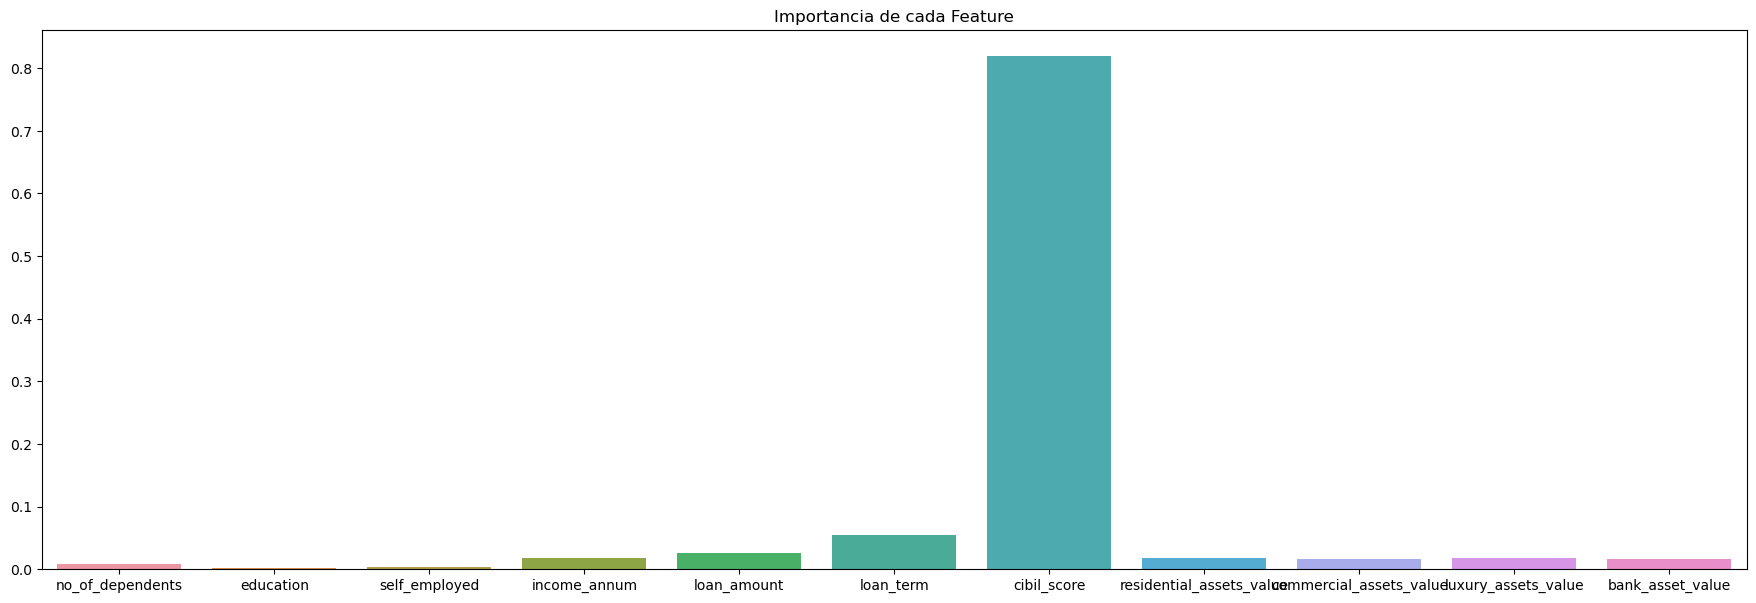

In [95]:
plt.figure(figsize=(22,7))
importances = model.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances)
plt.title('Importancia de cada Feature')
plt.show()

In [96]:
importances = model.feature_importances_

In [97]:
importances

array([0.00811382, 0.00250168, 0.00290742, 0.01766002, 0.02656396,
       0.05512494, 0.81982756, 0.01805285, 0.0160787 , 0.0170188 ,
       0.01615023])

Aca podemos ver como la variable cibil_score es la que tiene una preponderancia mayor, incidiendo casi unicamente en la aprobacion o no de un loan. Vamos a probar si dejando solo las 5 variables que mayor importancia tienen y limpiando el resto, nuestros modelos básicos probados anteriormente performan mejor


In [100]:
#Separamos en X e y.
xx = df.drop(['loan_status', 'no_of_dependents','education','self_employed','commercial_assets_value','luxury_assets_value','bank_asset_value',], axis=1) #Elimino de mi dataset la variable a predecir y todas las demas dejando solo las 6 nombradas anteriormente.
y = df.loan_status #Defino el Target

In [101]:
#Escalo los datos para ponerlos a todos en la misma sintonia
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xx_scaled=scaler.fit_transform (xx)

In [102]:
#Importamos la libreria para separar en train y test
from sklearn.model_selection import train_test_split 

#Me quedo con 30% para test y 70% para train
xx_train, xx_test, y_train, y_test = train_test_split(xx, y, test_size=0.30, random_state=42)

### Decision Tree

In [103]:
tree = DecisionTreeClassifier(max_depth=15, random_state = 42) #Creamos el modelo

#Ajustamos el modelo
tree.fit(xx_train,y_train)

y_train_pred = tree.predict(xx_train) #Prediccion en Train
y_test_pred = tree.predict(xx_test) #Prediccion en Test

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9836065573770492


### KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier
# Paso 1
knn = KNeighborsClassifier(n_neighbors=3)

# Paso 2
knn.fit(xx_train, y_train)

# Paso 3
y_test_pred = knn.predict(xx_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.5597189695550351


### Regresión

In [105]:
from sklearn.linear_model import LogisticRegression

# Paso 1
regresion_logistica = LogisticRegression(random_state=11)

# Paso 2
regresion_logistica.fit(xx,y)

# Paso 3
y_test_pred = regresion_logistica.predict(xx_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.7283372365339579


### Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
# Paso 1
model = RandomForestClassifier(random_state=11, n_jobs=6)
# Paso 2
model.fit(xx_train, y_train)
# Paso 3
y_test_pred = model.predict(xx_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9812646370023419


In [107]:
datos = [[0.9758, 0.9836],
         [0.5691, 0.5597],
         [0.6331, 0.7283],
         [0.9774, 0.9812]]

columnas = ['All Features', 'Reduce Features'] # definimos los nombres de las columnas
filas = ['Decision Tree', 'KNN', 'Regresion Logistica', 'Random Forest'] # definimos los nombres de las filas

comparacion_accuracy = pd.DataFrame(datos, columns=columnas, index=filas)

print(comparacion_accuracy)

                     All Features  Reduce Features
Decision Tree              0.9758           0.9836
KNN                        0.5691           0.5597
Regresion Logistica        0.6331           0.7283
Random Forest              0.9774           0.9812


<Axes: >

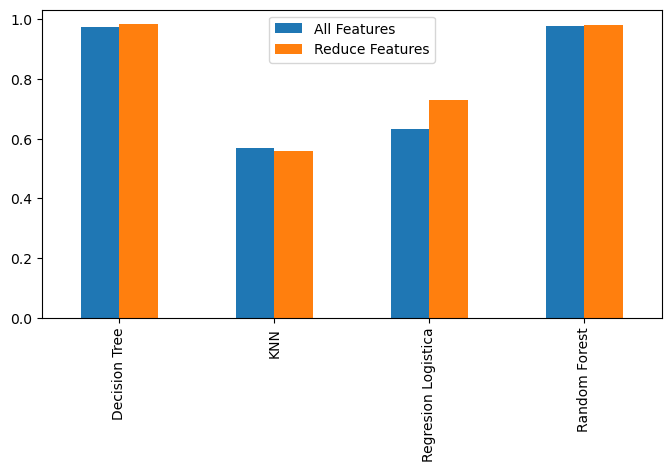

In [109]:
comparacion_accuracy.plot.bar(figsize=(8,4))

### Modelos de Boosting

Ahora vamos a probar la accuracy con los modelos de boosting que suelen ser mucho mas eficaces, y lo compararemos con los utilizados anteriormente.

**ADABOOST**`

In [110]:
from sklearn.ensemble import AdaBoostClassifier


In [111]:
# Creamos un AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50,learning_rate=1)

In [112]:
#Fiteamos el modelo
model_ada = ada.fit(X_train, y_train)

#Predicción
y_test_pred = model_ada.predict(X_test)#Prediccion en Test
y_train_pred = model_ada.predict(X_train)#Prediccion en Train

In [113]:
#Accuracy!
print("Accuracy en set de evaluacion:",accuracy_score(y_test, y_test_pred))
print("Accuracy en set de entrenamiento:",accuracy_score(y_train, y_train_pred))

Accuracy en set de evaluacion: 0.9648711943793911
Accuracy en set de entrenamiento: 0.9792503346720214


**GRADIENT BOOSTING**`

In [115]:
from sklearn.ensemble import GradientBoostingClassifier

In [116]:
# Creamos un Gradient Boost Classifier
gbrt = GradientBoostingClassifier(random_state = 0)


In [117]:
#Entrenamos el modelo
model_gbrt = gbrt.fit(X_train, y_train)
#Predicción
y_test_pred = model_gbrt.predict(X_test)#Prediccion en Test
y_train_pred = model_gbrt.predict(X_train)#Prediccion en Train

In [118]:
#Accuracy
print("Accuracy en set de evaluacion:",accuracy_score(y_test, y_test_pred))
print("Accuracy en set de entrenamiento:",accuracy_score(y_train, y_train_pred))

Accuracy en set de evaluacion: 0.9750195160031225
Accuracy en set de entrenamiento: 0.9956492637215528


**XG BOOST**`

In [122]:
import xgboost as xgb
from xgboost import XGBClassifier

In [123]:
# Creamos un XG Boost Classifier
xgboost = XGBClassifier(objective='binary:logistic', n_estimators=1000,seed=123)

In [124]:
#Entrenamos el modelo
model_xgb = xgboost.fit(X_train, y_train)
#Predicción
y_test_pred = model_xgb.predict(X_test) #Prediccion en Test
y_train_pred = model_xgb.predict(X_train) #Prediccion en Train

In [125]:
#Accuracy
print("Accuracy en set de evaluación:",accuracy_score(y_test, y_test_pred))
print("Accuracy en set de entrenamiento:",accuracy_score(y_train, y_train_pred))

Accuracy en set de evaluación: 0.9765807962529274
Accuracy en set de entrenamiento: 1.0


**LIGHT GBM**`

In [126]:
import lightgbm as lgb

In [127]:
# Creamos un Light GBM Classifier
lightgbm = lgb.LGBMClassifier()

In [128]:
#Entrenamos el modelo
model_lightgbm = lightgbm.fit(X_train, y_train)
#Predicción
y_test_pred = model_lightgbm.predict(X_test) #Prediccion en Test
y_train_pred = model_lightgbm.predict(X_train) #Prediccion en Train

[LightGBM] [Info] Number of positive: 1846, number of negative: 1142
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1428
[LightGBM] [Info] Number of data points in the train set: 2988, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.617805 -> initscore=0.480240
[LightGBM] [Info] Start training from score 0.480240
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [129]:
#Accuracy
print("Accuracy en set de evaluación:",accuracy_score(y_test, y_test_pred))
print("Accuracy en set de entrenamiento:",accuracy_score(y_train, y_train_pred))

Accuracy en set de evaluación: 0.9789227166276346
Accuracy en set de entrenamiento: 1.0


De todos los modelos, teniendo en cuenta todas las variables, el que mayor accuracy nos da es el Light GBM con un 0.9789. Vamos a proceder a realizar todas las metricas para ver en detalle su performance.


# **Métricas Algoritmo de Clasificación Boosting**

In [131]:
# Training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

# Creamos un XG Boost y lo entrenamos!
lightgbm = lgb.LGBMClassifier()
model_lightgbm = lightgbm.fit(X_train, y_train)

# Calculamos las predicciones!
y_test_pred = model_lightgbm.predict(X_test) 

Train Data: (3415, 11), (3415,)
Train Data: (854, 11), (854,)
[LightGBM] [Info] Number of positive: 2125, number of negative: 1290
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1440
[LightGBM] [Info] Number of data points in the train set: 3415, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.622255 -> initscore=0.499130
[LightGBM] [Info] Start training from score 0.499130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [133]:
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Accuracy of the classifier is:',test_accuracy)

Accuracy of the classifier is: 0.9941451990632318


In [138]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


[[321   2]
 [  3 528]]


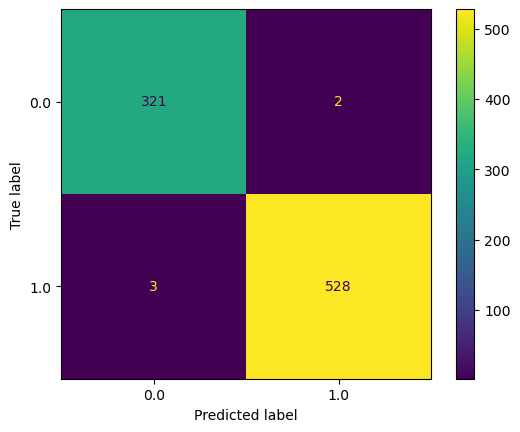

In [152]:
#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred))

#Ploteamos la Matriz
ConfusionMatrixDisplay.from_estimator(lightgbm, X_test, y_test)
plt.show()

In [144]:
from sklearn.metrics import precision_score

# Precision!
print(f"Precision Score of the classifier is: {precision_score(y_test, y_test_pred)}")

Precision Score of the classifier is: 0.9962264150943396


In [148]:
from sklearn.metrics import recall_score

# Recall
print(f"Recall Score of the classifier is: {recall_score(y_test,y_test_pred )}")

Recall Score of the classifier is: 0.9943502824858758


In [149]:
from sklearn.metrics import f1_score
# Calculo del F1 score
print(f"F1 Score of the classifier is: {f1_score(y_test,y_test_pred )}")

F1 Score of the classifier is: 0.9952874646559849


In [150]:
#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = lightgbm.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

AUC for our classifier is: 0.9998658993778898


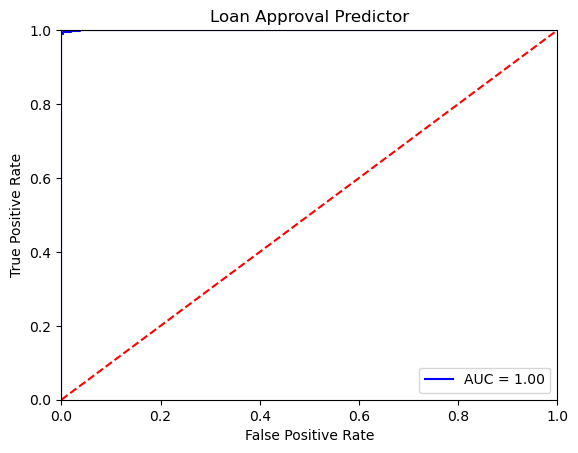

In [151]:
# Gráfica de la Curva ROC
plt.title('Loan Approval Predictor')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()